In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt

RESULT_FILE = os.path.join(
    os.path.dirname(os.getcwd()),
    "results/lcmv_runtime_table.csv"
)
assert os.path.isfile(RESULT_FILE), f"Cannot find {RESULT_FILE}"

PLOT_DIR = os.path.join(
    os.path.dirname(os.getcwd()),
    "plots/lcmv_runtimes"
)
if not os.path.isdir(PLOT_DIR):
    os.makedirs(PLOT_DIR)
assert os.path.isdir(PLOT_DIR)

In [3]:
timings = pd.read_csv(RESULT_FILE, index_col=0)
timings

,TCR-BERT (GPU),TCR-BERT (CPU),GLIPH,TCRDist3 (B)
Input size,,,,
500,7.900,8.150,69.74,2.23
1000,8.276,10.884,127.10,2.18
1500,8.602,14.545,240.14,2.62
2000,8.961,17.196,374.12,3.18
2500,9.245,20.254,596.37,3.85
5000,11.110,35.493,2792.24,6.91
10000,14.915,64.490,12241.63,19.41


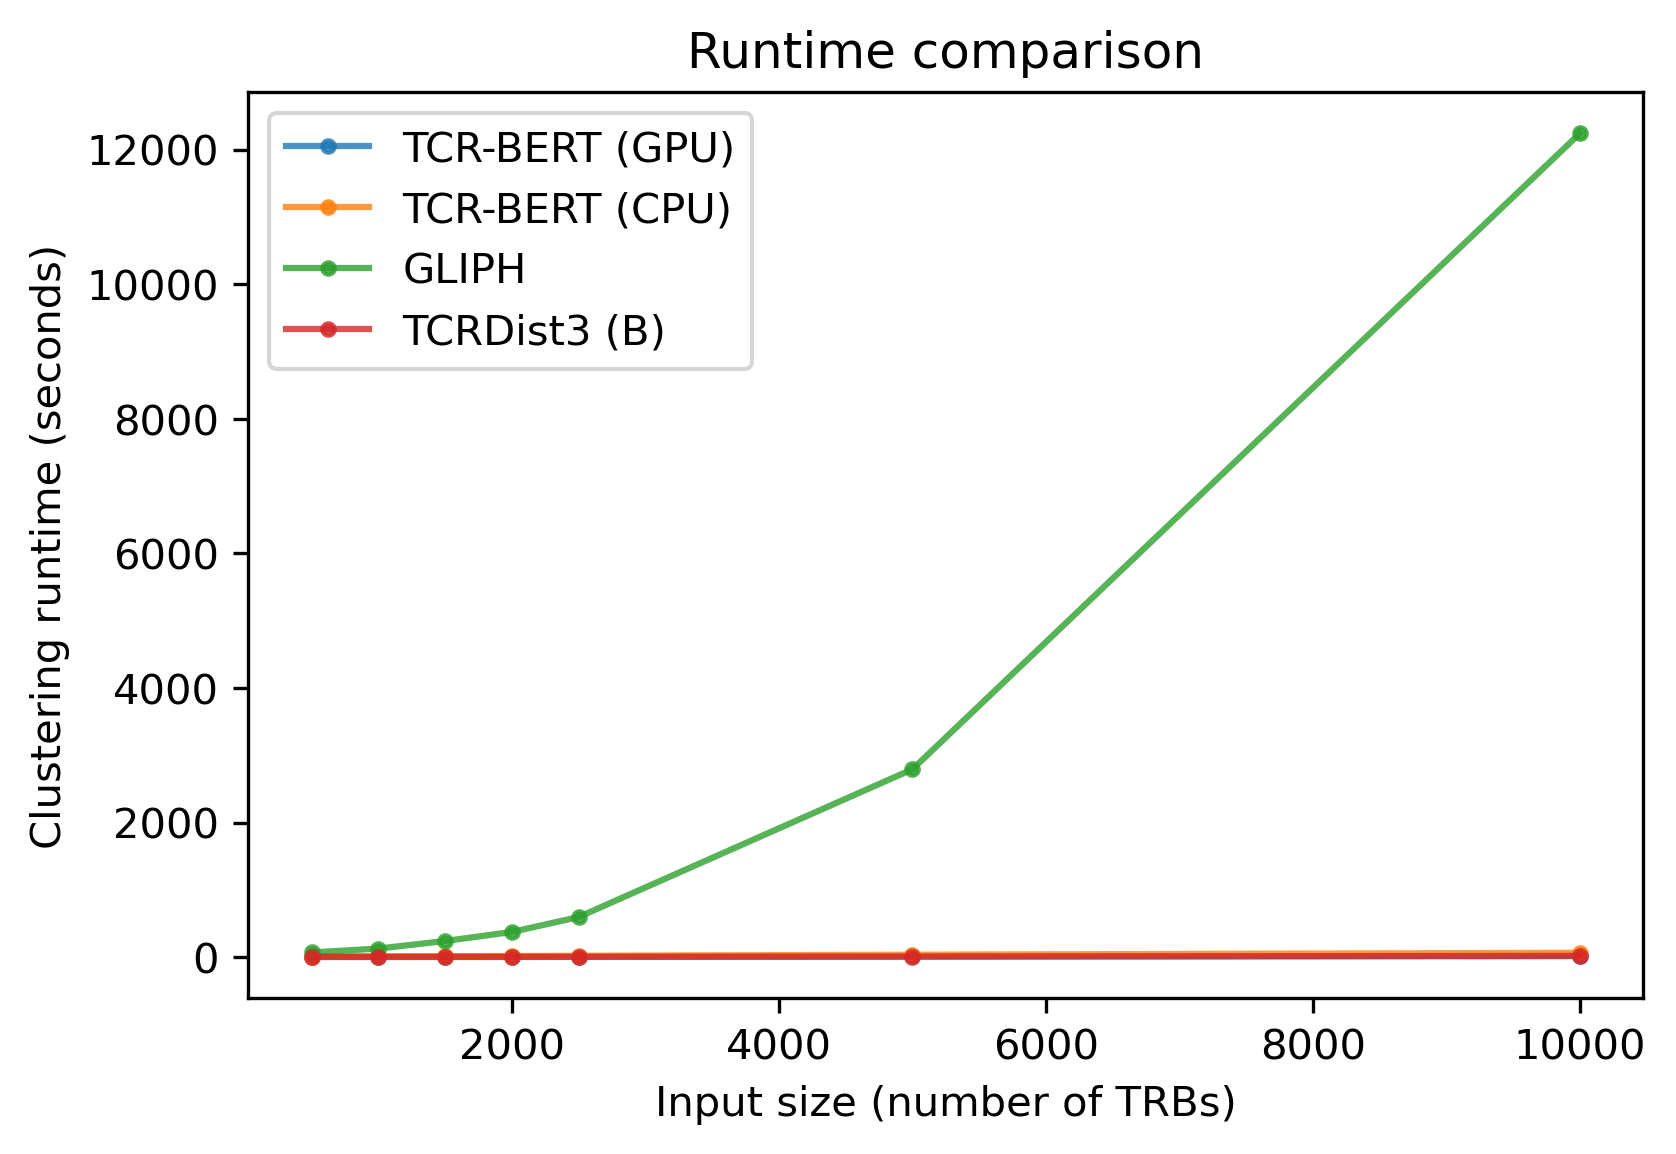

In [4]:
fig, ax = plt.subplots(dpi=300)
for col in timings.columns:
    ax.plot(
        timings.index, timings[col],
        alpha=0.8, label=col,
        marker='.',
    )
ax.legend()
ax.set(
    ylabel="Clustering runtime (seconds)",
    title="Runtime comparison",
    xlabel="Input size (number of TRBs)",
)
fig.savefig(os.path.join(PLOT_DIR, "lcmv_runtime.pdf"), bbox_inches='tight')
fig.show()

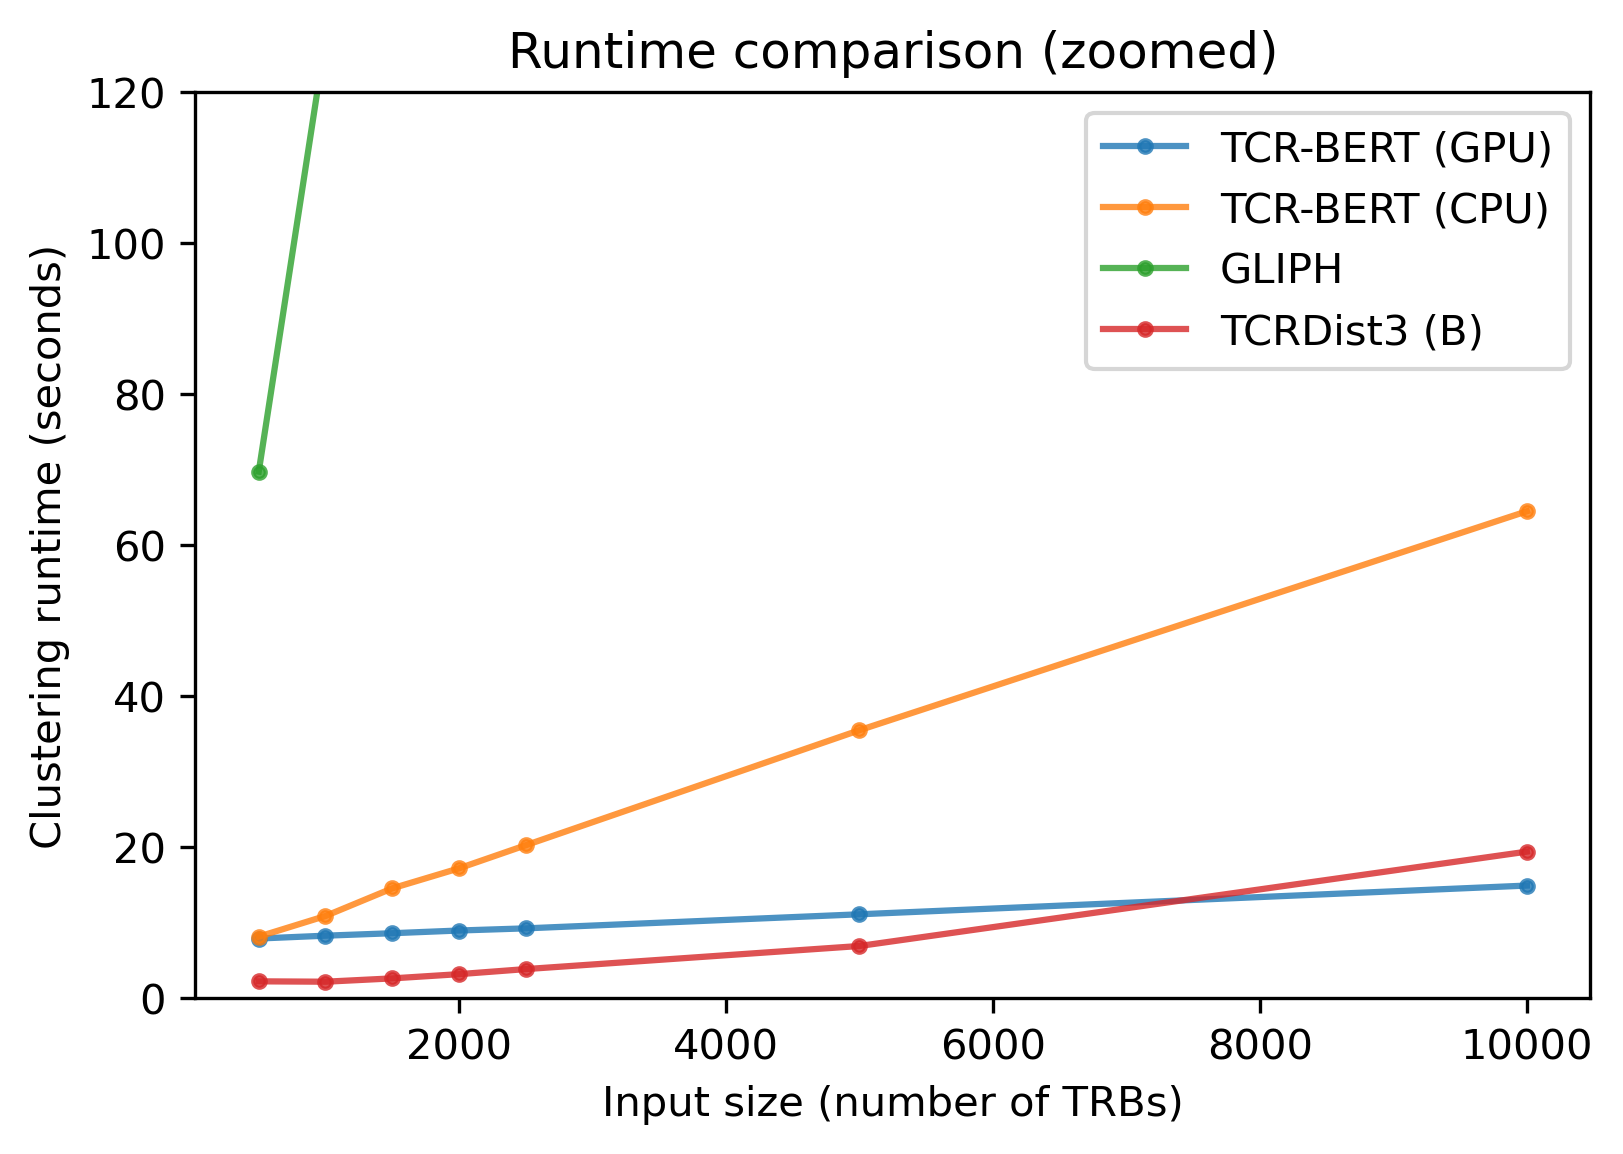

In [5]:
fig, ax = plt.subplots(dpi=300)
for col in timings.columns:
    ax.plot(
        timings.index, timings[col],
        alpha=0.8, label=col,
        marker='.',
    )
ax.legend()
ax.set(
    ylabel="Clustering runtime (seconds)",
    title="Runtime comparison (zoomed)",
    xlabel="Input size (number of TRBs)",
    ylim=(0, 120),
)
fig.savefig(os.path.join(PLOT_DIR, "lcmv_runtime_zoom.pdf"), bbox_inches='tight')
fig.show()

In [6]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(
    timings.index.values.reshape(-1, 1),
    timings['TCR-BERT (GPU)'].values.reshape(-1, 1),
)

m, b = linear_model.coef_.item(), linear_model.intercept_.item()
m, b

(0.0007383698924731178, 7.485096774193551)

In [7]:
(timings['GLIPH'].iloc[-1] - b) / m

16569127.517169481

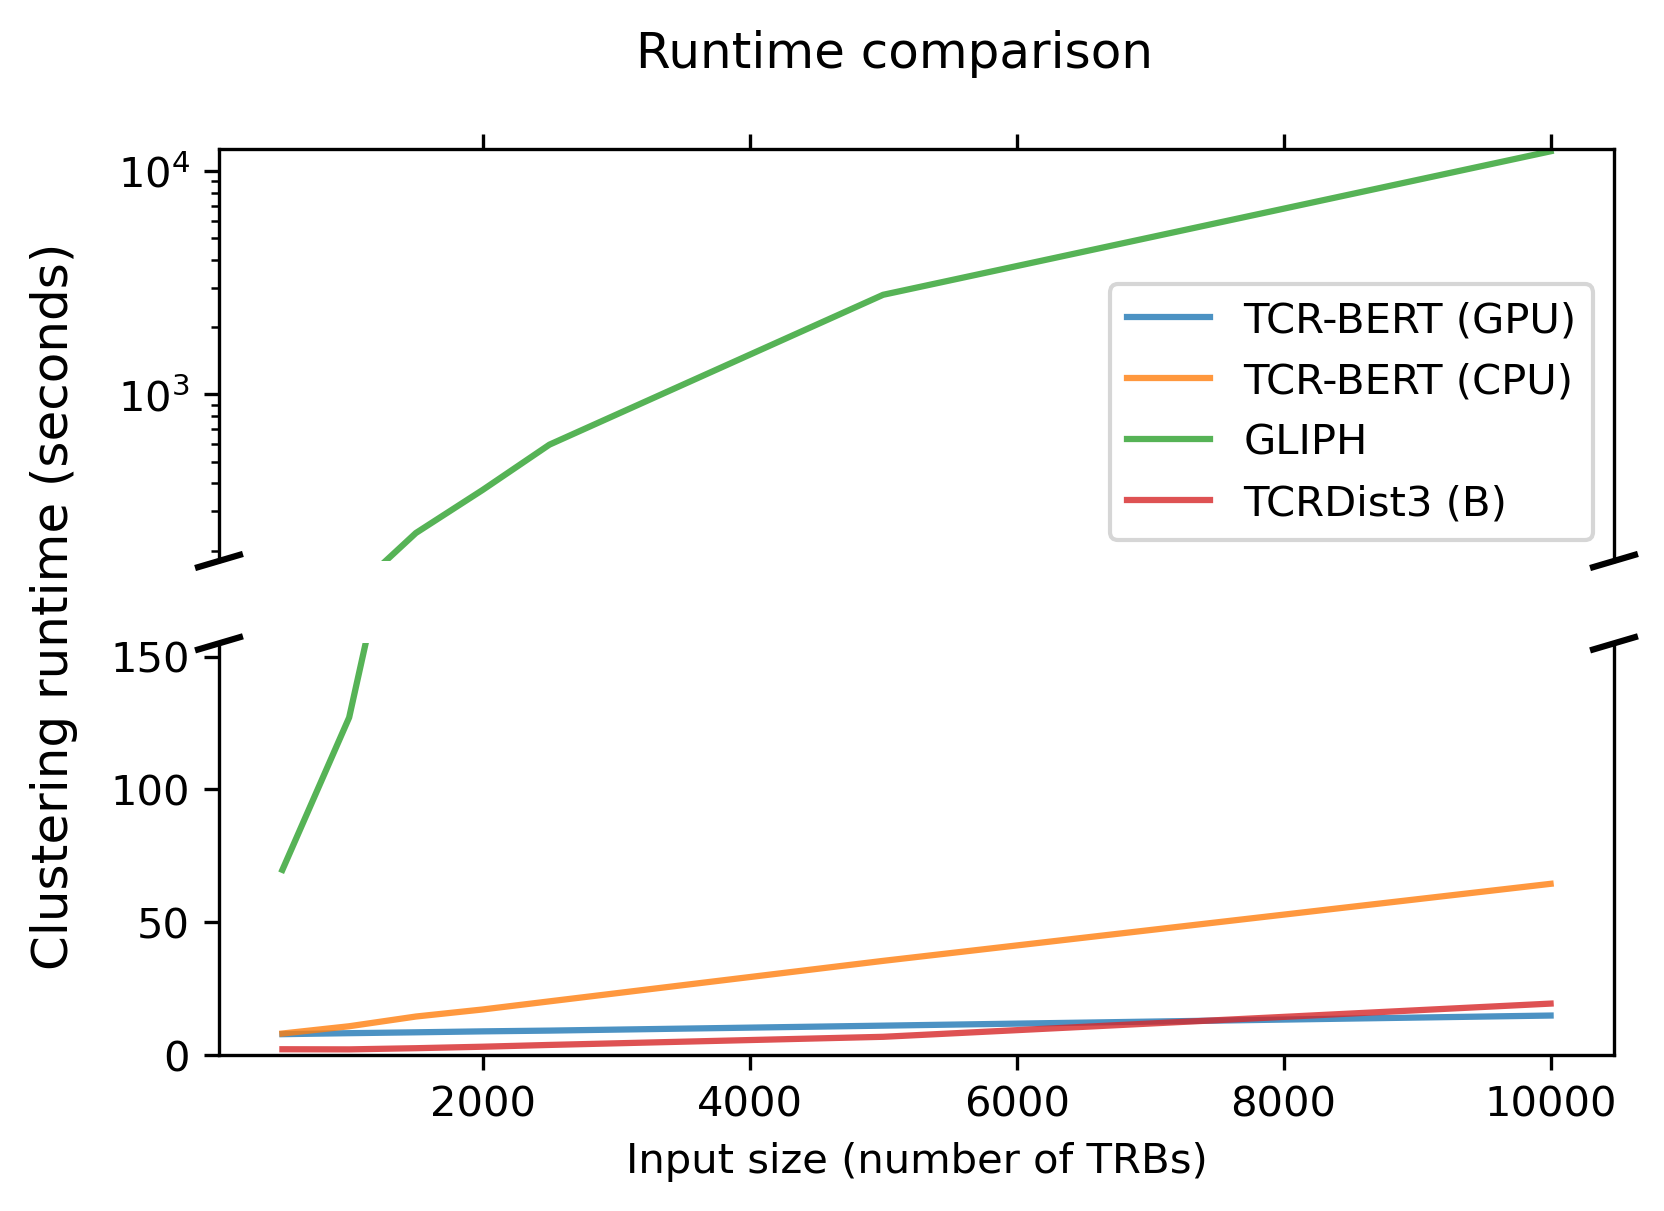

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True, dpi=300)
for ax in axes:  # Plot the same data in both axes
    for col in timings.columns:
        ax.plot(
            timings.index, timings[col],
            alpha=0.8, label=col,
        )
ax1, ax2 = axes  # Top is ax1, bottom is ax2

ax1.set_ylim(180, 12512)
ax1.set_yscale('log')
ax2.set_ylim(0, 155)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Hatch lines
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax1.legend()
fig.supylabel("Clustering runtime (seconds)")
ax2.set(xlabel="Input size (number of TRBs)")
fig.suptitle("Runtime comparison")

fig.savefig(os.path.join(PLOT_DIR, "lcmv_runtime_split.pdf"), bbox_inches='tight')
fig.show()